<h1 style="font-size:240%; color:blue; text-align:center; line-height:45px;"> 1. Transformadas sobre Imágenes </h1>

<p style="font-size:135%;">Las transformadas en general son usadas para pasar de un dominio a otro, el cambio de dominio permite realizar algunas operaciones con mayor facilidad. El dominio más utilizado en las transformaciones, frecuencia, permite filtrar, comprimir, analizar armónicos, entre otras operaciones. Para el caso del taller se analizarán las funciones de compresión de imágenes y atenuación del ruido.</p>

<p style="font-size:135%;">Las librerías y una imagen de prueba usadas se muestran a continuación:</p>

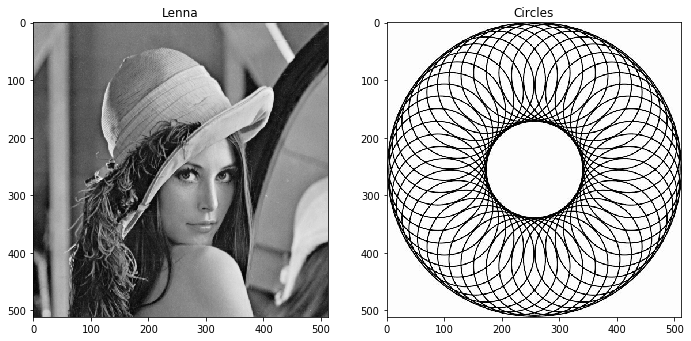

In [2]:
from matplotlib import pyplot as plt
from IPython.display import Image
import numpy as np
from numpy.linalg import inv
import pywt
import cv2
import math
import time

img = cv2.imread("Figures/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("Figures/Circles.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) ,plt.imshow(img, cmap='gray')
plt.title('Lenna')
plt.subplot(122) ,plt.imshow(img2, cmap='gray')
plt.title('Circles')
plt.show()



<h1 style="font-size:180%; color:blue; text-align:center; line-height:45px;"> 1.1. Transformada de Walsh-Hadamard </h1>

<p style="font-size:135%;">La transformanda de Walsh-Hadamard, a diferencia de la transformada de Fourier, usa ondas rectangulares en el rango de $(-1,+1)$, contrario a las usualmente usadas ondas sinusoidales. Aunque cumple con las propiedades de ser simétrica y ortogonal, además su calculo es completamente basado en números reales. Su expresión de transformación directa e inversa se ilustran a continuación:</p>

<ul style="font-size:150%; text-align:center;">
    $WH(u,v) = \frac{1}{N} \sum_{x=0}^{N} \sum_{y=0}^{N} f(x,y)(-1)^{\sum_{i=0}^{n-1} b_i(x) p_i(u)+b_i(y) p_i(v)}$
</ul>

<ul style="font-size:150%; text-align:center;">
    $f(x,y) = \frac{1}{N} \sum_{x=0}^{N} \sum_{y=0}^{N} WH(u,v)(-1)^{\sum_{i=0}^{n-1} b_i(x) p_i(u)+b_i(y) p_i(v)}$
</ul>

<p style="font-size:135%;">
Estas expresiones pueden reducirse, hallando los coeficientes de transformación, a partir de una matriz de unos con un patrón de signos, por ejemplo, para el caso bidimensional básico se tiene la siguiente matriz:
</p>

<ul style="font-size:125%; text-align:center;">
$H_2 = \begin{bmatrix}
1 & 1\\ 
-1 & 1
\end{bmatrix}$
</ul>

<p style="font-size:135%;">
El patrón que sigue para coeficientes mayores es el siguiente:
</p>

<ul style="font-size:125%; text-align:center;">
$H_{2N} = \begin{bmatrix}
H_N & H_N\\ 
H_N & -H_N
\end{bmatrix}$
</ul>

<p style="font-size:135%;">
Como resultado del cálculo anticipado de los coeficientes, el cálculo de la transformada se vuelve mucho más rápido, reduciéndose a una multiplicación de matrices.
</p>

<ul style="font-size:125%; text-align:center;">
$A = \frac{1}{\sqrt{N}} H_N \Rightarrow T = AFA^{-1}$
</ul>

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


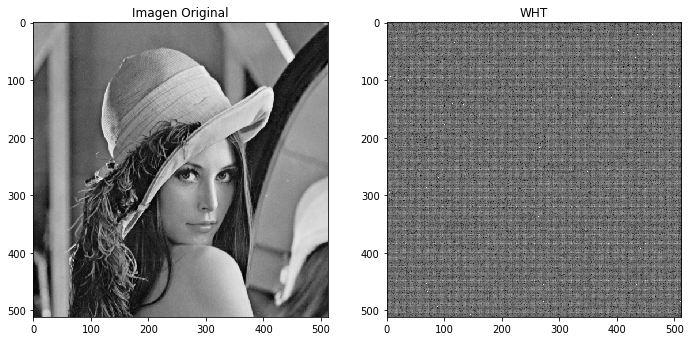

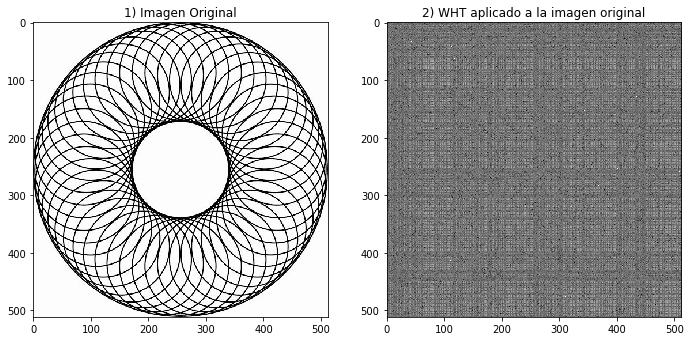

In [3]:
def H(n):    
    if n == 2:
        return np.matrix([[1, 1], [1,-1]])
    else:
        h = np.zeros((n,n))
        m = int(n/2)
        h[0:m,0:m] = H(m)
        h[m:n,0:m] = H(m)
        h[0:m,m:n] = H(m)
        h[m:n,m:n] = -H(m)
        return h
        
def WHT(img):
    n = img.shape[0]    
    h = H(n)
    ih = inv(h)
    T = np.dot(h, np.dot(img, ih))*1/(n)
    return T

def iWHT(T):
    n = T.shape[0]    
    h = H(n)
    ih = inv(h)
    nImg = np.dot(ih, np.dot(T, h))*1/(n)
    return nImg

tImg = WHT(img)
tImg = 20*np.log(np.abs(tImg))
plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(tImg, cmap='gray')
plt.title('WHT')

tImg2 = WHT(img2)
reimg2 = iWHT(tImg2)
tImg2 = 20*np.log(np.abs(tImg2))
plt.figure(2)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img2, cmap='gray')
plt.title('1) Imagen Original')
plt.subplot(122) , plt.imshow(tImg2, cmap='gray')
plt.title('2) WHT aplicado a la imagen original')

plt.show()



<h1 style="font-size:180%; color:blue; text-align:center; line-height:45px;"> 2. Compresión de Imágenes </h1>

<h1 style="font-size:150%; color:blue; text-align:left; line-height:45px;"> 2.1. Transformada de Fourier </h1>

<p style="font-size:135%;">Para la transformada de Fourier, se lleva una imagen base del dominio espacial a un dominio frecuencial, donde se toma una porción central de la imagen transformada y de esta subimagen se aplica la transformada de Fourier inversa para obtener la imagen comprimida. Dependiendo del tamaño de la porción de la imagen transformada, la imagen comprimida tendrá el mismo tamaño de la subimagen tomada, aunque hay que tomar en cuenta que a un menor tamaño se tiene mayor pérdida de calidad de la imagen comprimida.</p>

<p style="font-size:135%;">La librería OpenCV tiene una función de aplicación de transformada de Fourier conocida como dft2 o fft2, la cual se utilizará para aplicar la Transformada de Fourier y obtener una imagen comprimida.</p>

<p style="font-size:135%;">En el siguiente código, para una imagen de prueba se aplicará esta transformada y se visualizará como resultados a las imagen original, las imagen transformada, una porcion central de la imagen transformada y la imagen comprimida resultante de la aplicación de la transformada inversa de Fourier a la subimagen mencionada:</p>

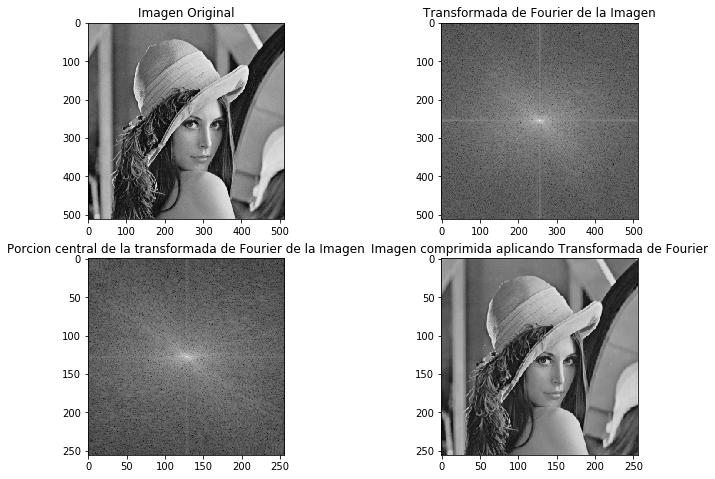

Tiempo de ejecución =  0.03492331504821777 segundos


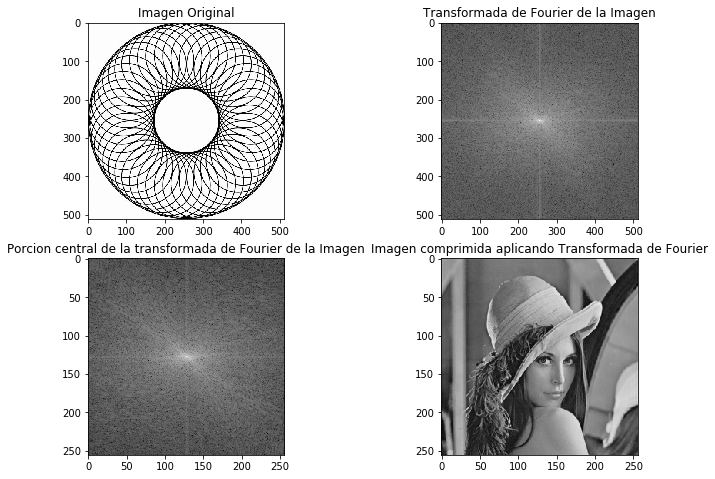

Tiempo de ejecución =  0.0490269660949707 segundos


In [20]:
def FourierCompression(img):
       
    h = img.shape[0]
    w = img.shape[1]
    
    cmpImage = np.zeros((h, w), np.uint8)  
    
    fft = np.fft.fft2(img)
    fshift = np.fft.fftshift(fft)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    fCmp = fshift[int(h/2-h/4):int(h/2+h/4), int(w/2-w/4):int(w/2+w/4)]
    submagnitude_spectrum = 20*np.log(np.abs(fCmp))
    
    ishift = np.fft.ifftshift(fCmp)
    cmp = np.fft.ifft2(ishift)
    cmp = np.abs(cmp)
    
    return magnitude_spectrum[:,:], submagnitude_spectrum[:,:], cmp

start = time.time()
magS, smagS, cmp = FourierCompression(img)
end = time.time()
exeTime = end - start

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(221) , plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(222) , plt.imshow(magS, cmap='gray')
plt.title('Transformada de Fourier de la Imagen')
plt.subplot(223) , plt.imshow(smagS, cmap='gray')
plt.title('Porcion central de la transformada de Fourier de la Imagen')
plt.subplot(224) , plt.imshow(cmp, cmap='gray')
plt.title('Imagen comprimida aplicando Transformada de Fourier')
plt.show()
print('Tiempo de ejecución = ', exeTime, 'segundos')

start = time.time()
magS2, smagS2, cmp2 = FourierCompression(img2)
end = time.time()
exeTime = end - start

plt.figure(2)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(221) , plt.imshow(img2, cmap='gray')
plt.title('Imagen Original')
plt.subplot(222) , plt.imshow(magS, cmap='gray')
plt.title('Transformada de Fourier de la Imagen')
plt.subplot(223) , plt.imshow(smagS, cmap='gray')
plt.title('Porcion central de la transformada de Fourier de la Imagen')
plt.subplot(224) , plt.imshow(cmp, cmap='gray')
plt.title('Imagen comprimida aplicando Transformada de Fourier')
plt.show()
print('Tiempo de ejecución = ', exeTime, 'segundos')

<h1 style="font-size:150%; color:blue; text-align:left; line-height:45px;"> 2.2. Transformada del Coseno (Algoritmo JPG) </h1>

<p style="font-size:135%;">Para la transformada de Coseno, se considera una matriz como kernel que ayudará a realizar la compresión de la imagen, esta matriz es de tamaño 8x8, por cada subimagen de tamaño 8x8 conexa, esta se considerará como una muestra, a la cual se aplica una operación de normalización componente a componente para aplicar la transformada coseno a esa muestra normalizada, luego, con la muestra normalizada se aplica un producto matricial junto al kernel, esta nueva subimagen resultante se normalizará y se le aplicará al resultando la transformada coseno inversa, y se toma la subimagen superior izquierda de tamaño 4x4 que hará parte de la imagen comprimida. A partir de los valores del kernel, la compresión aplicando la transformada coseno variará de resultado visualmente. Si intenta comparar el resultado de la compresión con la transformada de Fourier con la compresión con la transformada Coseno, se pueden notar diferencias en el resultado puesto que aplicando la transformada de Fourier o Wavelet visualmente se tiene un mejor nivel de detalle mientras que en este caso, se puede apreciar una pérdida de detalles en la imagen comprimida.</p>

<p style="font-size:135%;">La librería OpenCV tiene una función de aplicación de transformada de Coseno conocida como dct, la cual se utilizará para aplicar la Transformada de Coseno y obtener una imagen comprimida.</p>

<p style="font-size:135%;">En el siguiente código, para una imagen de prueba se aplicará esta transformada y se visualizará como resultados a las imagen original, el kernel y la imagen transformada:</p>

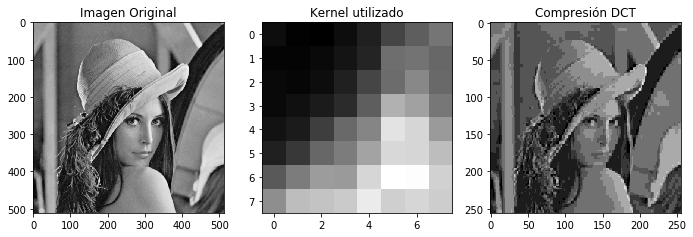

Tiempo de ejecución =  0.11419105529785156 segundos


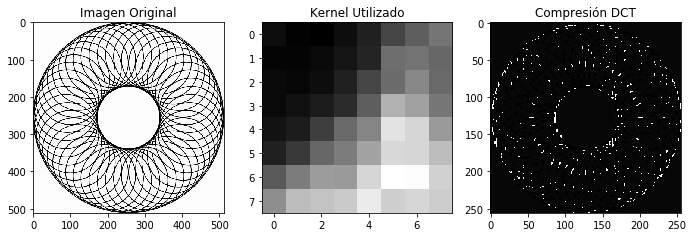

Tiempo de ejecución =  0.12290740013122559 segundos


In [24]:
def JPEG(img):
    
    qMtx = np.matrix('16 11 10 16 24 40 51 61;\
                      12 12 14 19 26 58 60 55;\
                      14 13 16 24 40 57 69 56;\
                      14 17 22 29 51 87 80 62;\
                      18 22 37 56 68 109 103 77;\
                      24 35 55 64 81 104 103 92;\
                      49 64 78 77 103 121 120 101;\
                      72 92 95 98 112 100 103 99').astype('float32')
    n = len(qMtx)    
    h = img.shape[0]
    w = img.shape[1]
    
    nc = int(len(qMtx)/2)
    hc = math.floor(h/2)
    wc = math.floor(w/2)
    
    cmpImage = np.zeros((hc, wc), np.uint8)  
    for i in range(0, math.floor(h/n)):
        for j in range(0, math.floor(w/n)):
            sample = img[i*n:i*n+8,j*n:j*n+8]
            imf = np.float32(sample)/255.0
            dct = cv2.dct(imf)
            qDct = (dct*127/qMtx).astype(int)
            idct = cv2.idct(np.float32(qDct)/255.0) 
            cmpImage[i*nc:i*nc+4,j*nc:j*nc+4] = (idct[0:4,0:4]*255).astype(int)
    return qMtx, cmpImage

start = time.time()
kern, cmp = JPEG(img)
end = time.time()
exeTime = end - start

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(131) , plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(132) , plt.imshow(kern, cmap='gray')
plt.title('Kernel utilizado')
plt.subplot(133) , plt.imshow(cmp, cmap='gray')
plt.title('Compresión DCT')
plt.show()

print('Tiempo de ejecución = ', exeTime, 'segundos')

start = time.time()
kern2, cmp2 = JPEG(img2)
end = time.time()
exeTime = end - start

plt.figure(2)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(131) , plt.imshow(img2, cmap='gray')
plt.title('Imagen Original')
plt.subplot(132) , plt.imshow(kern2, cmap='gray')
plt.title('Kernel Utilizado')
plt.subplot(133) , plt.imshow(cmp2, cmap='gray')
plt.title('Compresión DCT')
plt.show()

print('Tiempo de ejecución = ', exeTime, 'segundos')



<h1 style="font-size:150%; color:blue; text-align:left; line-height:45px;"> 2.3. Transformada Wavelet </h1>

<p style="font-size:135%;">Para la transformada Wavelet, en este caso solo se hace un escalado de un nivel, es decir, las dimensiones en ancho y alto de la imagen se van a reducir a la mitad. Para compresión de imágenes, esta transformada se puede asimilar a una operación en la que el nuevo pixel tendría como color a un promedio con cierta ponderación de 2 pixeles de la imagen original, es decir, a parte de comprimir la imagen a la mitad de dimensiones, se podrá apreciar un ligero filtro pasabajo aplicado. Visualmente, esta transformada puede comprimir imágenes sin tan ta pérdida de calidad, lo cual es un buen resultado.</p>

<p style="font-size:135%;">La librería Pywt tiene una función de aplicación de transformada Wavelet conocida como wavedec2, la cual se utilizará para aplicar la Transformada Wavelet y obtener una imagen comprimida.</p>

<p style="font-size:135%;">En el siguiente código, para una imagen de prueba se aplicará esta transformada a un nivel (Reducción de ancho y alto a la mitad) y se visualizará como resultado a las imagen original y la imagen transformada:</p>

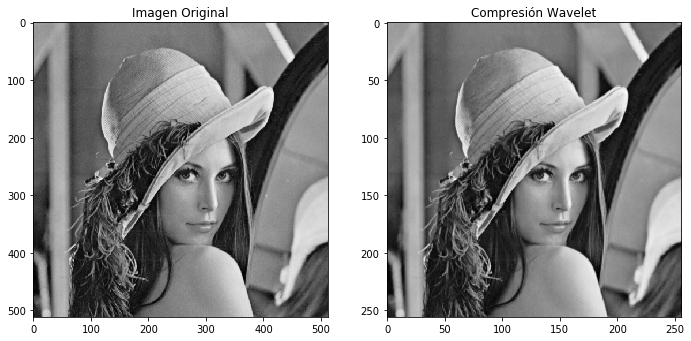

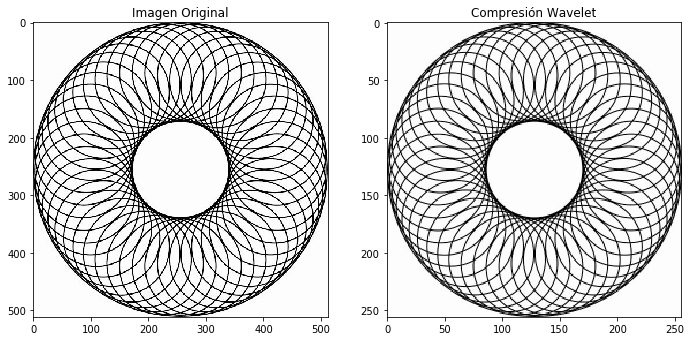

Tiempo de ejecución =  0.004615068435668945


In [5]:
def w2d(img, mode='haar', level=1):    
    coeffs=pywt.wavedec2(img, mode, level=level)
    return coeffs[0]

dwtImg = w2d(img)

start = time.time()
cmp = w2d(img)
end = time.time()
exeTime = end - start

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(cmp, cmap='gray')
plt.title('Compresión Wavelet')
plt.show()

start = time.time()
cmp2 = w2d(img2)
end = time.time()
exeTime = end - start

plt.figure(2)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img2, cmap='gray')
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(cmp2, cmap='gray')
plt.title('Compresión Wavelet')
plt.show()

print('Tiempo de ejecución = ', exeTime)

<h1 style="font-size:240%; color:blue; text-align:center; line-height:45px;"> 3. Reducción de Ruido en Imágenes </h1>

<p style="font-size:135%;">En el siguiente código, se preparan unas imágenes con ruido aplicado para visualizar el desempeño de los filtros mostrados en la reducción de este ruido:</p>

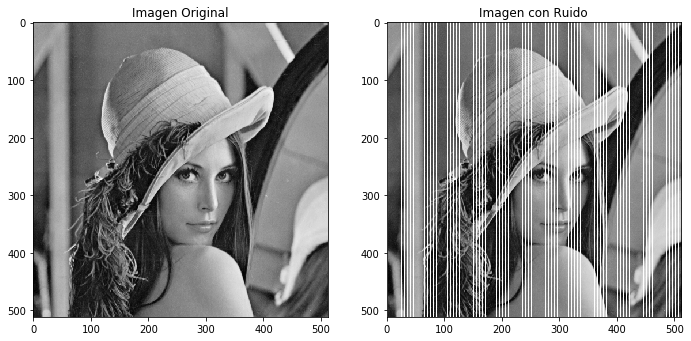

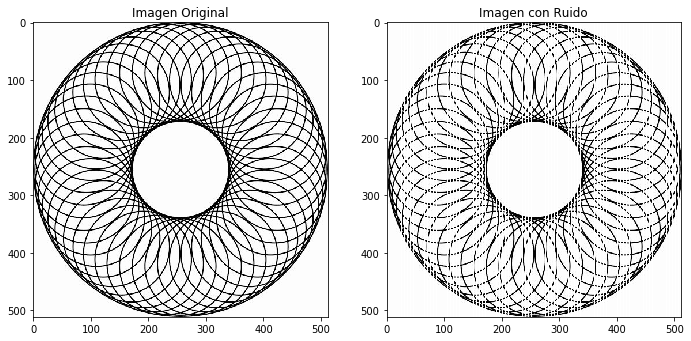

In [6]:
def noisy(img):
    out = np.copy(img)
    for y in range(len(img)):
        for x in range(len(img)):
            if y % 5 == 0:
                out[x,y] = 255
    return out

nImg = noisy(img)
plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(nImg, cmap='gray')
plt.title('Imagen con Ruido')
plt.show()

nImg2 = noisy(img2)
plt.figure(2)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img2, cmap='gray')
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(nImg2, cmap='gray')
plt.title('Imagen con Ruido')
plt.show()


<h1 style="font-size:150%; color:blue; text-align:left; line-height:45px;"> 3.1. Transformada Coseno </h1>

<p style="font-size:135%;">Para la transformada Coseno, en este caso, la imagen original inicialmente se normaliza, luego se aplica la transformada Coseno directa, y a la imagen obtenida, se aplica un umbral para frecuencia baja y alta para tomar solamente la imagen que se adapte a este umbral (Dado que se manejará un umbral para frecuencias bajas y altas, este filtro será pasabandas), luego, esta imagen umbralizada se desnormalizará (Se pasa de valor máximo de 1 a un valor máximo de 255), y se aplicará la transformada coseno inversa.</p>

<p style="font-size:135%;">La librería OpenCV tiene una función de aplicación de transformada Coseno conocida como dct, la cual se utilizará para aplicar la Transformada Coseno y obtener una imagen filtrada con ruido reducido.</p>

<p style="font-size:135%;">Visualmente, se puede apreciar que el filtro definido con esta transformada es bueno puesto que no se evidencia el ruido en un porcentaje significativo comparado con la imagen con ruido original, aunque a una mayor reducción de estos ruidos, se notará un efecto de mayor borrosidad en la imagen debido a otras altas frecuencias como los contornos.</p>

<p style="font-size:135%;">En el siguiente código, para una imagen de prueba con y sin ruido, se aplicará esta transformada y se visualizará como resultado a las imagen original, la imagen transformada y la imagen filtrada.</p>

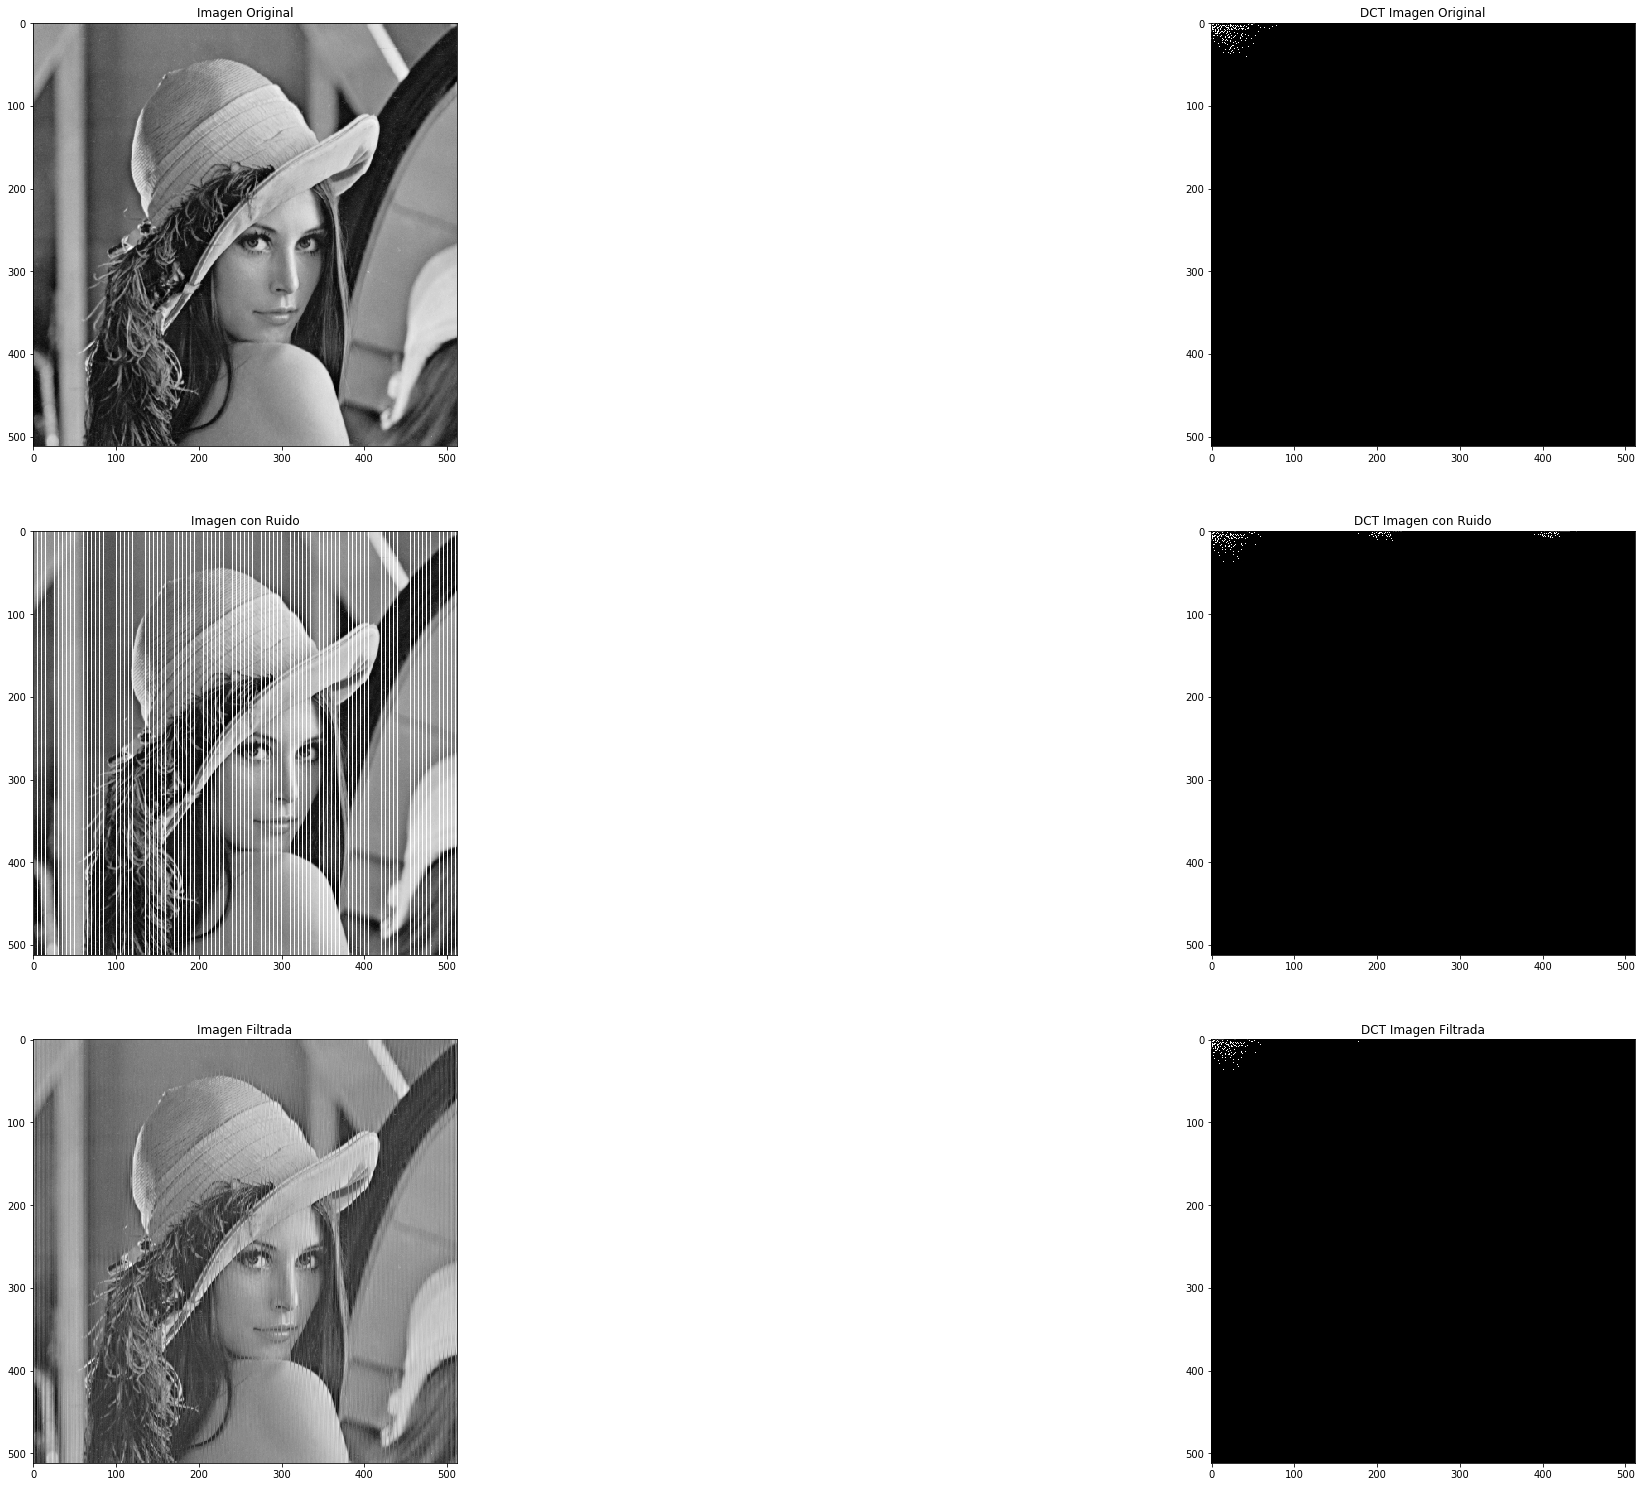

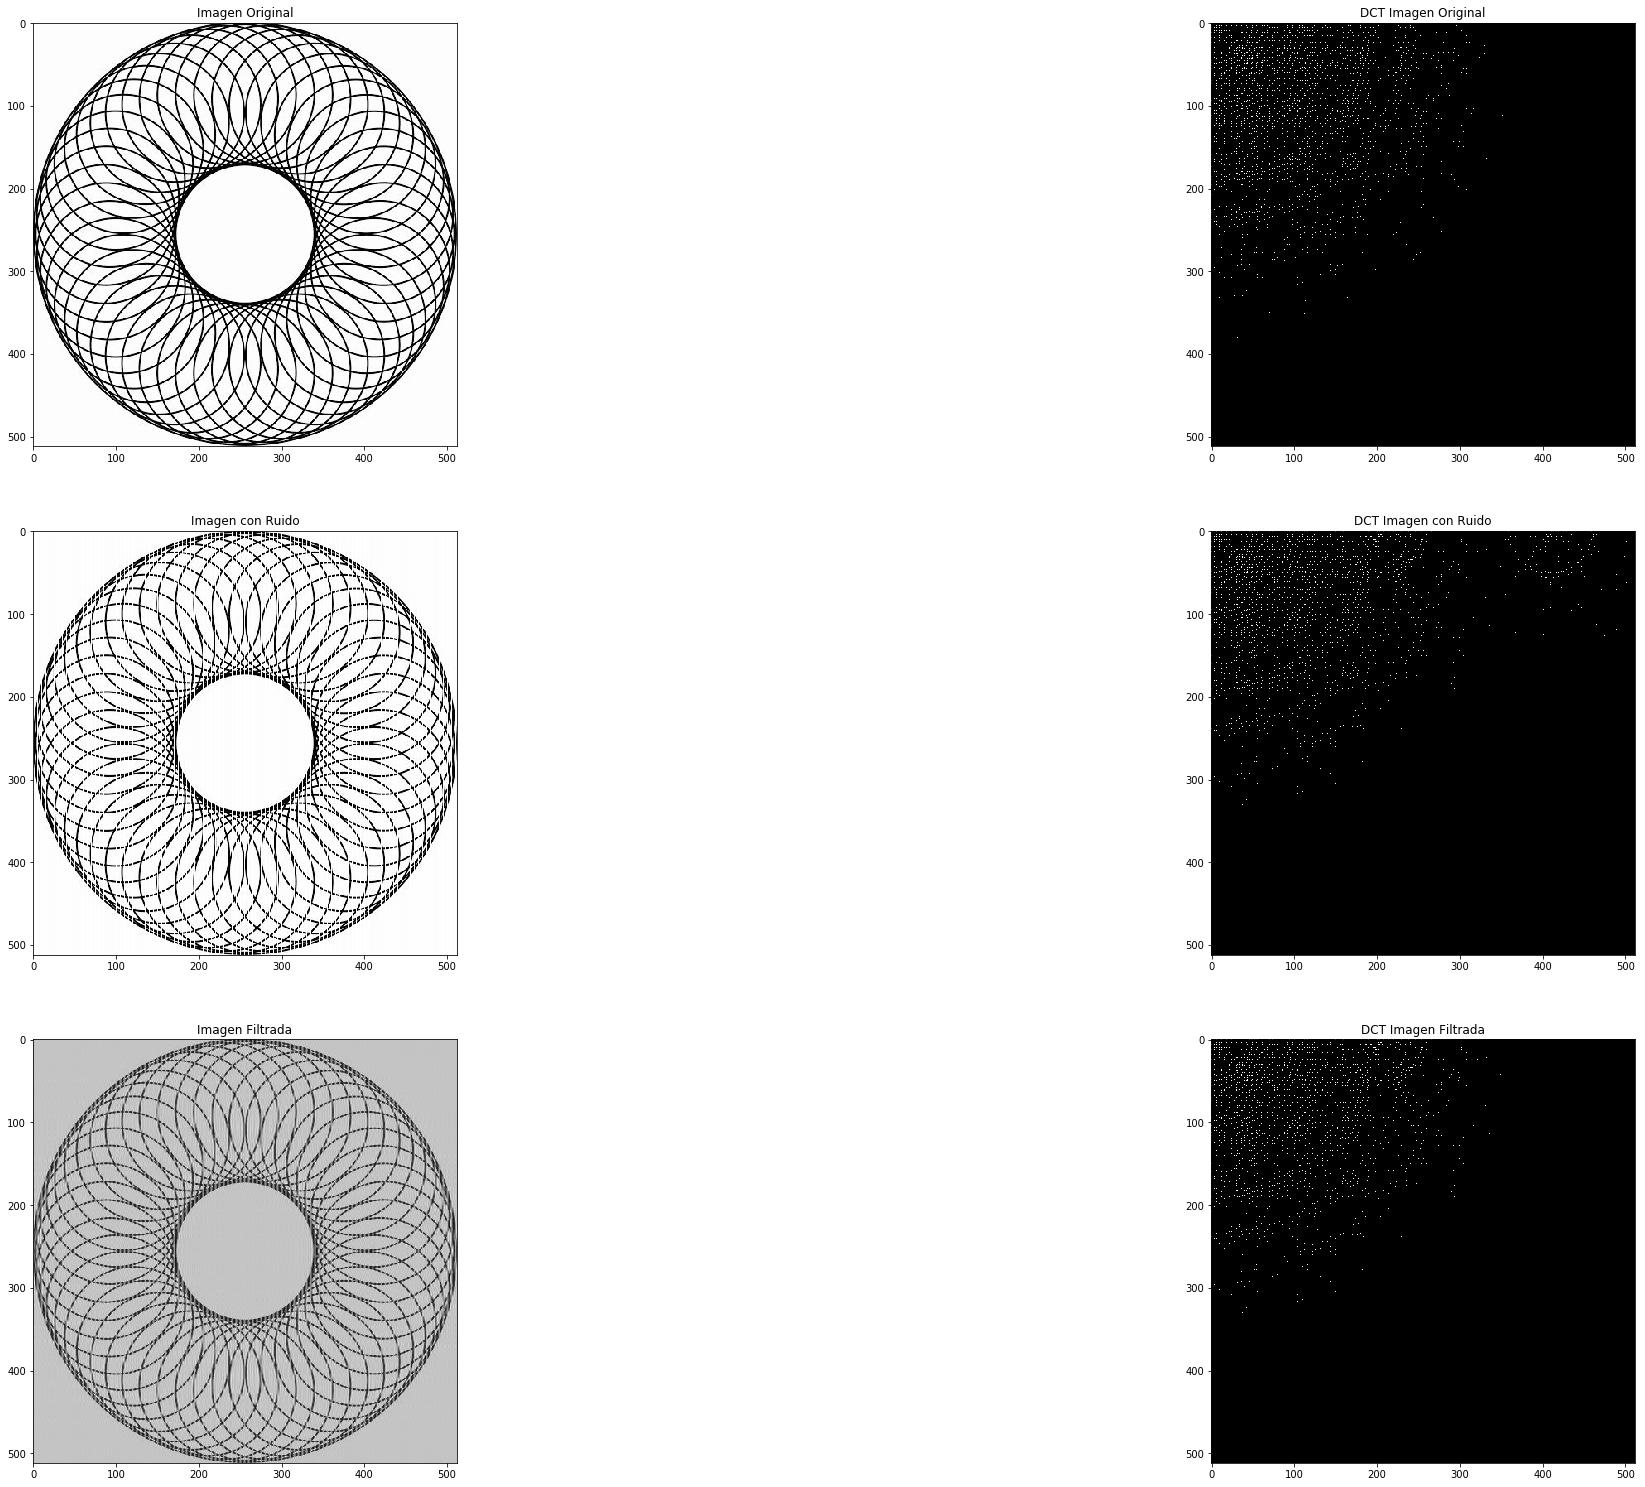

In [10]:
def DCT(img):
    T = np.float32(img)/255.0
    dct = cv2.dct(T)
    odct = np.uint8(dct)*255.0 
    return odct

def fDCT(img, x, y):
    T = np.float32(img)/255.0
    dct = cv2.dct(T)    
    dct[x[0]:x[1],y[0]:y[1]] = 0
    odct = np.uint8(dct)*255.0 
    fImg = cv2.idct(np.float32(dct)/255.0) 
    return fImg, odct

dctImg = DCT(img)
dctNImg = DCT(nImg)
flt, fdct = fDCT(nImg, (0,30), (180,450))

plt.figure(1)
plt.subplots_adjust(left=0.0, right=5.0, bottom=0.0, top=5.0)
plt.subplot(321) , plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(322) , plt.imshow(dctImg, cmap='gray')
plt.title('DCT Imagen Original')
plt.subplot(323) , plt.imshow(nImg, cmap='gray')
plt.title('Imagen con Ruido')
plt.subplot(324) , plt.imshow(dctNImg, cmap='gray')
plt.title('DCT Imagen con Ruido')
plt.subplot(325) , plt.imshow(flt, cmap='gray')
plt.title('Imagen Filtrada')
plt.subplot(326) , plt.imshow(fdct, cmap='gray')
plt.title('DCT Imagen Filtrada')

dctImg = DCT(img2)
dctNImg = DCT(nImg2)
flt, fdct = fDCT(nImg2, (0,150), (350,len(nImg2)))

plt.figure(2)
plt.subplots_adjust(left=0.0, right=5.0, bottom=0.0, top=5.0)

plt.subplot(321) , plt.imshow(img2, cmap='gray')
plt.title('Imagen Original')
plt.subplot(322) , plt.imshow(dctImg, cmap='gray')
plt.title('DCT Imagen Original')
plt.subplot(323) , plt.imshow(nImg2, cmap='gray')
plt.title('Imagen con Ruido')
plt.subplot(324) , plt.imshow(dctNImg, cmap='gray')
plt.title('DCT Imagen con Ruido')
plt.subplot(325) , plt.imshow(flt, cmap='gray')
plt.title('Imagen Filtrada')
plt.subplot(326) , plt.imshow(fdct, cmap='gray')
plt.title('DCT Imagen Filtrada')

plt.show()


